# Project 1: Particle identification from detector response
---
_Responsible:_ Serena Palazzo (<serena.palazzo@cern.ch>)

In this project, you will apply some of the machine learning skills you have acquired in the course so far to tackle a real-world particle physics problem: Identification of particles from detector response.


### Physics Background
#### Inelastic scattering

The inelastic scattering is a process used to probe the inside structure of hadrons, in this case protons. In this process a incident particle (photoelectron) collides with a target proton. The kinetic energy of the incident particle is not conserved after the collision. During inelastic scattering a proton can break up into its constituent quarks which then form a hadronic jet. The angles of the deflection gives information about the nature of the process.

#### The Standard Model

The building blocks of matter are elementary particles. These particles are divided in two major types: quarks and leptons. The Standard Model also studies the interaction of these particles through fundamental forces (strong, weak and electromagnetic). For every type of particle there also exists a corresponding antiparticle.

**Quarks** are fundamental constituents of matter because they combine to form hadrons. There are six quarks paired in three groups: "up/down", "charm/strange" and "top/bottom". They are held together through strong forces.

**Hadrons** They divide in Baryons and Mesons. Baryons are made of three quarks. For example protons are made of (uud) quarks and neutrons are made of (udd) quarks. Mesons contain one quark and one antiquark. An example of a meson is a pion which is made of an up quark and a down antiquark. Another example of a meson is kaon, it is formed by a up or down quark and a anti-strange quark.

**Leptons** have a 1/2 spin and do not undergo strong interactions. There are six leptons, three of wich have an electrical charge. These are: electron, muon and tau. The three remaining are neutrinos. A positron is the antiparticle counterpart of an electron. It possess the same mass and spin but positive charge.

### Datasets

The data you should use in this project is provided at this link: https://cernbox.cern.ch/index.php/s/4GSHq223r6EBaeU

It is a simulation of electron-proton inelastic scattering measured by a particle detector system.

**Goal** you will have to detect **4 particle types**. Your **label** is the particle ID, listed below: 
- positron (-11), 
- pion (211), 
- kaon (321),
- proton (2212); 

The **features** provided to identify particles are six detector responses. Some detector responses are zero due to detector inefficiencies or incomplete geometric coverage of the detector.

The features are listed below:
- **p** momentum (GeV/c)
- **theta** (rad)
- **beta**
- **nphe** number of photo-electrons
- **ein** inner energy (GeV)
- **eout** outer energy (GeV)

The dataset is already splitted below into training and test datasets.

### Notes on assessment

Here is an incomplete list of potential studies you could do, by training:

* A decision tree (DT), RandomForest based classifier on the high-level variables
* A flat deep neural network (DNN) classifier on the high-level variables
* A convolutional neural network (CNN) or Autoencoders classifier
* A generative model classifier
* Three separate CNNs with the same hyperparameters on each of the three image class, to assess impact of preprocessing
* A (variational) auto-encoder (VAE, AE) on the images for anomaly detection
* A VAE on the images for image generation


To complete this project, you should:
* Perform **around three or four studies** similar to the above (but not necessarily restricted to just these), 
* **Submit your Jupyter notebook** as a "report." See the comments below on documentation,

    * You get points for submitting; I don’t care about your score, but try to make the best effort you can.
    
When doing each of your studies, you should try to follow the below steps (where it makes sense; rough weight in marking indicated in parentheses):

1. **Data exploration and preprocessing (10%):** Inspect the datasets; visualise the data in an appropriate way; study the impact of the provided weights; perform any necessary preprocessing.
2. **Model selection (30%):** Choose a promising approach; construct the machine learning model; optimise the relevant hyperparameters; train your chosen model.
3. **Performance evaluation (20%):** Evaluate the model in a way that gauges its ability to generalise to unseen data; compare to other approaches; identify the best approach. Useful performance measures include class accuracy, the _reciever-operating characteristic_ (ROC) curve, the confusion matrix etc.
4. **Discussion, style throughout (40%):** Discuss the reasoning or intuition behind your choices; the results you obtain through your studies; the relative merits of the methods you have developed, _etc._ Similarly, make sure that you write efficient code, document your work, clearly convey your results, and convince us that you have mastered the material.


That is, **you should submit, by Friday 4 December 2020 at 4pm:**
* your report notebook via Turnitin.
    
**we're mostly concerned with _best practices:_** If you are careful and deliberate in your work, and show us that you can use the tools introduced in the course so far, we're happy!

Training all of these models in sequence took ca. 1 hour in all on my laptop, without using GPUs, so **don't spend hours on training hundreds of epochs.** 

The checkpoints in this track of the course have been very challenging, so I would like to emphasise that although this project is worth 13.5% of your course mark, compared to 3.5% for the checkpoints, and although you have roughly four times as long to do the project, **you are not expected to _spend_ four times the amount of time or effort on this project compared to the checkpoints.** (As far as I am concerned, you have already earned your marks.)

**If the project description is unclear, or if you experience any technical issues, please do let me know as quickly as possible. I can send around clarifications if I think it would be to the benefit of the entire class.**


### Documentation

Your reportnotebook should run without errors and give (mostly) reproducible results. It is important that **all** code is annotated and that you provide brief commentary **at each step** to explain your approach. Explain *why* you chose a given approach and *discuss* the results. You can also include any failed approaches if you provide reasonable explanation; we care more about you making an effort and showing that you understand the core concepts.

This is not in the form of a written report so do not provide pages of background material, but do try to clearly present your work so that the markers can easily follow your reasoning and can reproduce each of the steps through your analysis. Aim to convince us that you have understood the material covered in the course.

To add commentary above (or below) a code snippet create a new cell and add your text in "Markdown" format. Do not add any substantial commentary as a code comment in the same cell as the code. To change the new cell into markdown select from the drop down menu on the bar above the main window (the default is code)

## Loading in data
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Flatten,Dropout,Input
from tensorflow.python.keras.models import Sequential

/Users/marcusallen/opt/anaconda3/envs/daml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/marcusallen/opt/anaconda3/envs/daml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/marcusallen/opt/anaconda3/envs/daml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/marcusallen/opt

In [2]:
# read the dataset
data = pd.read_csv( "pid-5M.csv")

In [3]:
print(data.shape)
print(np.unique(data['id']))
data.isnull().sum()

(5000000, 7)
[ -11  211  321 2212]


id       0
p        0
theta    0
beta     0
nphe     0
ein      0
eout     0
dtype: int64

In [4]:
data.describe()

,id,p,theta,beta,nphe,ein,eout
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,9.941839e+02,1.230053e+00,4.889321e-01,8.995796e-01,3.575243e+00,5.635883e-02,7.033195e-02
std,9.724034e+02,7.414895e-01,2.942161e-01,1.132321e-01,1.779236e+01,7.882675e-02,1.020604e-01
min,-1.100000e+01,2.101170e-01,9.222140e-02,5.500010e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.110000e+02,6.657510e-01,2.817420e-01,8.378760e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.110000e+02,1.066150e+00,4.048670e-01,9.461940e-01,0.000000e+00,3.442440e-02,4.417490e-02
75%,2.212000e+03,1.649650e+00,6.117800e-01,9.855910e-01,0.000000e+00,6.834520e-02,9.365990e-02
max,2.212000e+03,5.286950e+00,2.219270e+00,1.499590e+00,3.490000e+02,8.993820e-01,1.097410e+00


# DATA PREPROCESSING

In [5]:
X = data.drop('id',axis=1 ,inplace=False)
y=pd.get_dummies(data['id'])

### Split dataset into training and test

In [6]:
features = data.drop('id', axis=1)
labels = data['id']

In [7]:
#test and train split using sklearn.model_selection on Both shortened and full dataset
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.22, random_state = 1)

# Data preprocessing
First a function will be created in order to sample the data with equal weights of the 4 particle types. This is used to create models and sort the data at more manageable run times. Also amount of data given to models can be varied to see the affect it may have.

In [8]:
"""
Create a shortened sample to reduce run times of fit
"""
def data_sample(N):
    data1 = data.sample(frac=1).reset_index(drop=True)
    frames = [data1[data1.id==-11].head(N)
    ,data1[data1.id==211].head(N)
    ,data1[data1.id==321].head(N)
    ,data1[data1.id==2212].head(N)]

    sample = pd.concat(frames)
    features = sample.drop('id', axis=1)
    labels = sample["id"]


    return train_test_split(features, labels, test_size = 0.22, random_state = 1)

In [9]:
x_train_short, x_test_short, y_train_short, y_test_short =  data_sample(10000)
x_train_2, x_test_2, y_train_2, y_test_2 = data_sample(100000)

In [10]:
#imports
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

import tensorflow as tf
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense
from sklearn.metrics import confusion_matrix


## Data Visualisation
A pairplot is made to get a sense of the data


In [11]:
def data_visualistation():
    N = 40

    frames = [data[data.id==-11].head(N)
    ,data[data.id==211].head(N)
    ,data[data.id==321].head(N)
    ,data[data.id==2212].head(N)]

    sample = pd.concat(frames)

    group = sample.groupby(['id', 'theta',"nphe","ein","eout"])['p', 'beta'].mean().reset_index()
    feat1 = "p"
    feat2 = "beta"

    colour = group.id
    fig, ax = plt.subplots()

    for i in group.id.unique():
        #Boolean Mask
        mask = group["id"] == i

        ax.scatter(group[mask][feat1],
                   group[mask][feat2],
                   label = i,alpha = 0.5)
        pass


    ax.legend()
    fig.set_size_inches(12, 7)
    ax.set_xlabel(feat1+"/K")
    ax.set_ylabel(feat2+"/Mv")
    plt.show()

    sns.pairplot(sample,hue = "id",palette = "Set1")

/Users/marcusallen/opt/anaconda3/envs/daml/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()


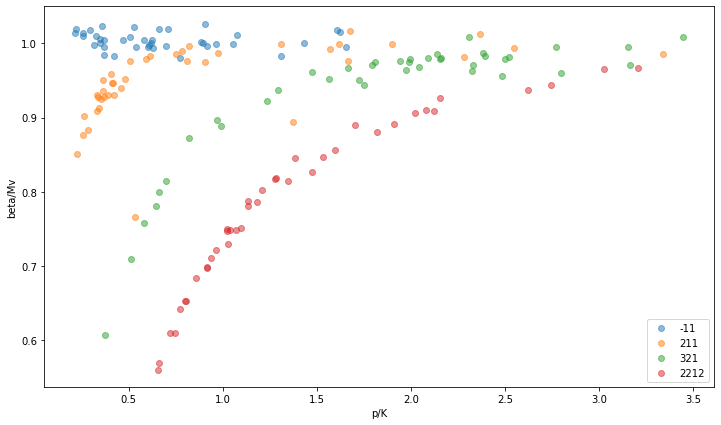

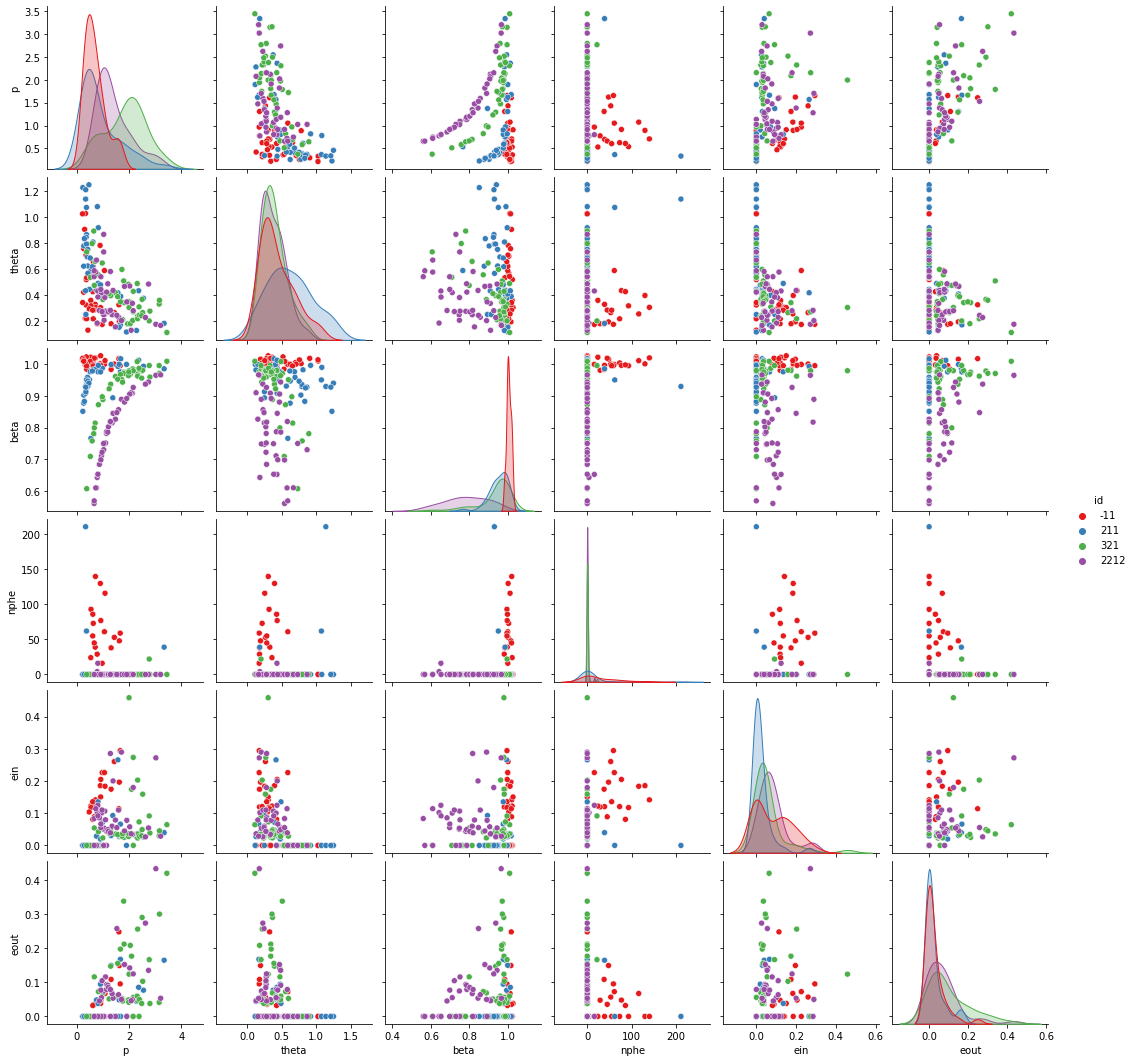

In [12]:
data_visualistation()

The data preprocessing involved making this pairplot above as well as creating a function to take smaller samples of the data for later use in ML models later in the project. The pairplots give us a lot of potential information and could maybe help us explain if ML models missclassify certain particles. Looking at this histograms it can be seen that they often lie on top of each other and often are very different. For instance, looking at the eout histogram the red and blue relating to positron and pion are almost perfectly overlayed, this could be a seed for some problems.

# PART 1 - DECISION TREES
## Three decision trees are made: normal, boosted and a random forest

In [13]:
"""
Decision Tree and Random Forest Classifier
"""
def decision_tree(x1=x_train_short,x2=x_test_short,y1=y_train_short,y2=y_test_short):
    # Create Decision Tree classifer object with these parameters
    Decision_Tree = DecisionTreeClassifier(criterion = 'entropy',max_depth =3 )

    # Train Decision Tree Classifer
    Decision_Tree = Decision_Tree.fit(x1,y1)

    # Predict the response for test dataset
    y_pred = Decision_Tree.predict(x2)
    print("Accuracy:",metrics.accuracy_score(y2, y_pred))
    
    export_graphviz(Decision_Tree,out_file="Star_tree.dot",rounded=True,filled=True)

    #save the decision_tree as png
    plt.figure(figsize=(25,20))
    tree.plot_tree(Decision_Tree,filled=True)
    plt.savefig("decision_tree.png")
    
    return metrics.accuracy_score(y2, y_pred)

def Decision_tree_exp(N_estimators = 20,max_d=3,x1=x_train_short,x2=x_test_short,y1=y_train_short,y2=y_test_short):
    Decision_Tree = DecisionTreeClassifier(criterion = 'entropy',max_depth =max_d )
    Decision_Tree = Decision_Tree.fit(x1,y1)
    y_pred = Decision_Tree.predict(x2)
    
    return metrics.accuracy_score(y2, y_pred)

def Boosted_decision_tree(n_est=20,max_d=3,x1=x_train_short,x2=x_test_short,y1=y_train_short,y2=y_test_short):
    Grad_boost = GradientBoostingClassifier(max_depth=max_d, n_estimators=n_est)
    Grad_boost.fit(x1, y1)
    y_pred = Grad_boost.predict(x2)
#     print("Accuracy:",metrics.accuracy_score(y_test_short, y_pred))
    return metrics.accuracy_score(y2, y_pred)

def Random_forest(n_est=20,max_d=3,x1=x_train_short,x2=x_test_short,y1=y_train_short,y2=y_test_short):
    # Fit a random forest classifier
    r_f = RandomForestClassifier(criterion = "entropy",n_estimators=n_est, max_depth=max_d)
    r_f.fit(x1, y1)
    y_pred = r_f.predict(x2)
#     print("Accuracy:",metrics.accuracy_score(y_test_short, y_pred))
    return metrics.accuracy_score(y2, y_pred)

Accuracy: 0.7181818181818181


0.7153409090909091

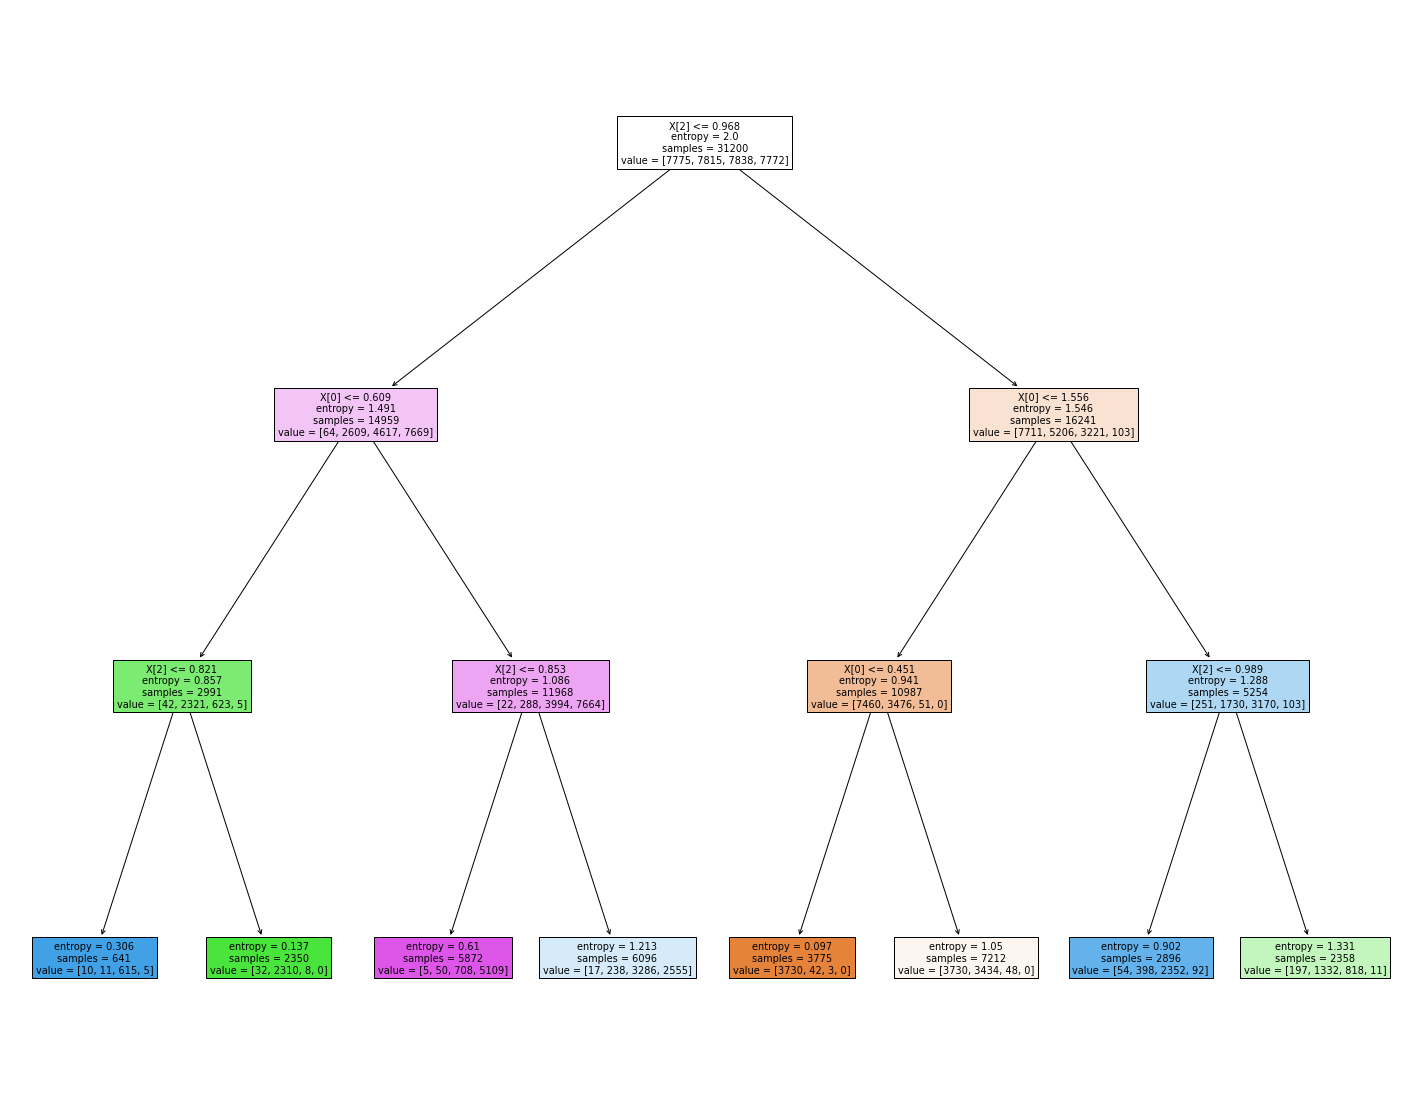

In [14]:
decision_tree()
Boosted_decision_tree(n_est=20,max_d=1)

The Decision tree for a single tree classifier is shown above and the accuracy calculated for a max depth of 3

## A Test of how N_estimators affects the accuracy of the Decision Tree will be carried out and the graphs shown below with Max depth set to 3 and data points used set to 40,000

In [15]:
def decision_estimator_tester(name,max_d):
    no_points = 20
    x = np.linspace(1,40,no_points)
    
    r_y = np.zeros(no_points)
    b_y = np.zeros(no_points)
    s_y = np.zeros(no_points)
    
    for i in range (len(x)):
        r_y[i] = Random_forest(int(x[i]),max_d)
        b_y[i] = Boosted_decision_tree(int(x[i]),max_d)
        s_y[i] = Decision_tree_exp(int(x[i]),max_d)

    plt.errorbar(x,b_y,fmt="+:")
    plt.errorbar(x,r_y,fmt="+:")
    plt.errorbar(x,s_y,fmt="+:")
    plt.title(f"N estimator vs Accuracy:Max_depth = {name}")
    plt.xlabel("N Estimators")
    plt.ylabel("Accuracy")
    plt.legend(["Boosted","Random Forest","Single tree"])
    plt.show()

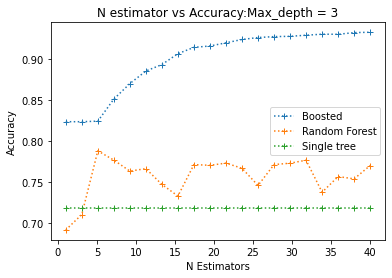

In [16]:
decision_estimator_tester("3",3)

The Graphs above show how the accuracy of the decision tree changes as the N estimators is increased. It can be seen that the Random Forest hits a plateau at around 10 estimators and struggles to rise further than an accuracy of 0.84. 
The Random Forest only manages to outperform the single tree very marginally. The number of data being trained on will be varied to see the effect.

The Boosted decision tree however steadily increases all the way up to 40 estimators; the accuracy also starts and ends much higher than for the Random Forest and single tree. 

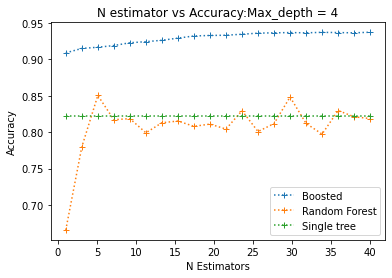

In [17]:
decision_estimator_tester("4",4)

## A Test of how max depth affects the accuracy of the decision tree's will be carried out with N_estimators set to 20 and number of data points used 40,000

In [18]:
def decision_depth_tester(no_points):
    N_est = 20
    x = np.linspace(1,no_points,no_points)
    r_y = np.zeros(no_points)
    b_y = np.zeros(no_points)
    s_y = np.zeros(no_points)
    
    for i in range (len(x)):
        r_y[i] = Random_forest(N_est,max_d =int(x[i]))
        b_y[i] = Boosted_decision_tree(N_est,max_d = int(x[i]))
        s_y[i] = Decision_tree_exp(N_est,max_d =int(x[i]))
    
    plt.errorbar(x,b_y,fmt="+:")
    plt.errorbar(x,r_y,fmt="+:")
    plt.errorbar(x,s_y,fmt="+:")
    plt.title(f"Max Depth vs Accuracy")
    plt.xlabel("Max Depth")
    plt.ylabel("Accuracy")
    plt.legend(["Boosted","Random Forest","Single tree"])
    plt.show()

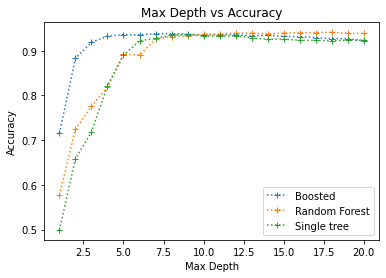

In [19]:
decision_depth_tester(20)

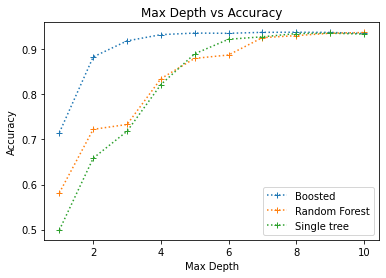

In [20]:
decision_depth_tester(10)

The max depth is studied here by varying it and witnessing the effect it has. Both the single tree and the random forest do very similarly which is quite surprising because N estimators is 20 and this should already be enough for the random forest to be getting a fairly even average, the exception is max_depth = 3 where the random forest jumps slightly although further tests would be required to see if this is randomness or anything meangiful. Also it is interesting that the single tree does not eventually overfit, the code could be run again going higher to see if the accuracy decreases as would be expected. However the boosted decision tree outperforms both the single and random tree untill they all plateau at around 0.94 accuracy, it is able to reach this plateau after just a max depth of 4 and massively outperforms the other methods for maxdepth < 3. So it would seem in terms of max depth Boosted decision tree is the most efficient reaching very high accuracies at fairly low depths, also there is no need to go over above max depth of 4 or 5 because the returns are very minimal.

The First graph where the max_depth is calculated all the way up tp 20 was run after these inital comments. It highlights some interesting things about the random forest tree compared to the other 2. It can be seent that both the single tree and the boosted tree reach a very high accuracy but there is a slow dropoff that begins to occur - it is more pronounced for the single tree - this is due to overfitting and discussed widely in machine learning. The random forest however does not suffer this decrease in accuracy due to the fact it averages over many single trees thereby smearing out any potential overfitting, this is shown quite clearly in the graph. So if a high dpeth is required the random forest is definitely the way to go.

## A study of how amount of input data affects the accuracy of the Decision Tree's will be carried out.

In [21]:
"""
Input data from 10,000 up to 500,000 will be tested with N Estimators at 20 and max depth of 3
"""

# input_data = [10000,20000]

def decision_data_test():
    input_data = [1000,5000,10000,20000,50000,100000,200000,300000,500000]
    Random_forest_acc = np.zeros(len(input_data))
    Boosted_acc = np.zeros(len(input_data))
    Single_tree_acc = np.zeros(len(input_data))
    
    for i in range(len(input_data)):
        x1, x2, y1, y2 = data_sample(input_data[i])
        
        Random_forest_acc[i] = Random_forest(20,3,x1, x2, y1, y2)
        Single_tree_acc[i] = Decision_tree_exp(20,3,x1, x2, y1, y2)
        Boosted_acc[i] = Boosted_decision_tree(20,3,x1, x2, y1, y2)
        
    plt.errorbar(input_data,Boosted_acc,fmt="+:")
    plt.errorbar(input_data,Single_tree_acc,fmt="+:")
    plt.errorbar(input_data,Random_forest_acc,fmt="+:")
    plt.title(f"Decsision Tree vs Amount of data")
    plt.xlabel("Amount of data")
    plt.ylabel("Accuracy")
    plt.legend(["Boosted","Single","Random Forest"])
    plt.semilogx()
    plt.show()
    
    plt.errorbar(input_data,Boosted_acc,fmt="+:")
    plt.errorbar(input_data,Single_tree_acc,fmt="+:")
    plt.errorbar(input_data,Random_forest_acc,fmt="+:")
    plt.title(f"Decsision Tree vs Amount of data")
    plt.xlabel("Amount of data")
    plt.ylabel("Accuracy")
    plt.legend(["Boosted","Single","Random Forest"])
    plt.show()
    
        

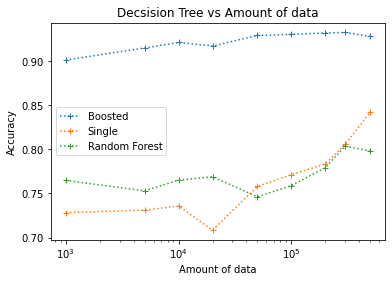

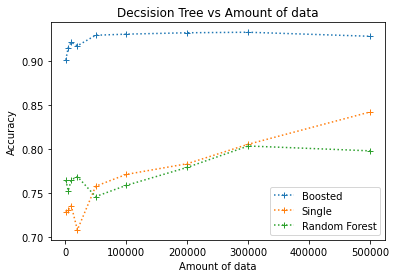

In [22]:
decision_data_test()

The graph shows the relation between amount of data seen by the decisision tree and the accurac. The boosted decision tree appears to stay quite stable and does therefore it can be presumed does not have a big dependence on the size of input data, it also outperforms both other models quite considerably all the way through. The Random forest initally does better than the single tree which is expected since the random tree is using 20 estimators and both models stay quite stable untill 20,000 data points when the single tree begins to rise rapidly and overtakes the random forest model, the random forest only starts to see an increase at 100,000 data points. This is quite interesting and might be to do with the randomness smearing out a good accuracy since max depth is only 3. 

Random forest is implemented to reduce overfitting and since the single tree does not appear to be overfitting then this is possibly why it doesn't make a huge difference and ends up with roughly similar accuracy. This is something that should be investigated further 

# PART 2 - Neural Networks

## A NN with a hidden layer will be made as well as a NN with two layers.

The deep NN will be able to abstract more information from the sytem and does not simply learn to predict an output Y given an input X, it can actually learn basic features about the system. So comparing the two NN's will show this difference hopefully. Given more data the deep NN should eventually outperform the shallow NN, so the networks will be trained both with the shortened dataset and the full dataset and the outcomes observed.

The models are made with 1 and 2 hidden dense layers respectively. The layers have 50 nodes and use the relu acitvation function - good for multiclassification problems. The Adam optimizer with sparse categorical crossentropy loss function are used

In [23]:
"""
The targets have to be changed to integer numbers beginning from 0 ending at 3 to use sparse categorical crossentropy
"""

def data_converter(x_train,x_test,y_train,y_test):
#     print(y_train_short)
    y_train = np.asarray(y_train)
    y_train[y_train==-11] = 0
    y_train[y_train==211] = 1
    y_train[y_train==321] = 2
    y_train[y_train==2212] = 3

    y_test = np.asarray(y_test)
    y_test[y_test==-11] = 0
    y_test[y_test==211] = 1
    y_test[y_test==321] = 2
    y_test[y_test==2212] = 3
    return x_train,x_test,y_train,y_test

"""
Hiden single Dense Layer NN
"""
def SHALLOW_NN():

    inputs = Input(shape=(6,))
    h_l = Dense(50, activation="relu")(inputs)
    outputs = Dense(4, activation="softmax")(h_l)
    model = Model(inputs=inputs, outputs=outputs)


    #losses = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=False, axis=-1)
    model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    model.summary()
    return model

"""
2 Hiden Dense Layers NN
"""
def DEEP_NN():
    inputs = Input(shape=(6,))
    h_1 = Dense(50, activation="relu")(inputs)
    h_2 = Dense(50, activation="relu")(h_1)
    outputs = Dense(4, activation="softmax")(h_2)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    model.summary()
    return model

def NN_plots(model,data_fit,x_train,x_test,y_train,y_test):
    model.evaluate(x_train,y_train)
    model.evaluate(x_test,y_test)
#     print(a)
    #epochs = np.linspace(1,100,100)

    val_loss = data_fit.history["val_loss"]
    loss = data_fit.history["loss"]
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title(f"Val_loss and loss vs epochs")
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(["Loss","Val_loss"])
    plt.show()

    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred,axis=1)

    a = confusion_matrix(y_test,y_pred)#create confusion matrix using metrics.plot_confusion_matrix
    fig=plt.figure(figsize=(8,8))
    cp = sns.heatmap(a,annot=True)
    plt.show()
    
def NN_fit(model,N,epochs=100,batch_size=32):
    x_train,x_test,y_train,y_test = data_sample(N) # get a sample of the full dataset
    
    x_train,x_test,y_train,y_test = data_converter(x_train,x_test,y_train,y_test) #convert so the data can be fit
    
    model_fit = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.2,shuffle=True,verbose=0) # fit the data
    
    return model_fit,x_train,x_test,y_train,y_test

def NN_accuracy(model,data_fit,x_train,x_test,y_train,y_test):
    train = model.evaluate(x_train,y_train)
    test = model.evaluate(x_test,y_test)
    return test[1]

### The shallow model will be compiled and fit first with N data equal to 40,000

In [24]:
shallow_model = SHALLOW_NN() 
shallow_fit,x1,x2,y1,y2 = NN_fit(shallow_model,10000)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense (Dense)                (None, 50)                350       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 204       
Total params: 554
Trainable params: 554
Non-trainable params: 0
_________________________________________________________________


The accuracy is then calculcated on the training and test data, val_loss and loss against epoch are plotted to show how the training went. The Confusion matrix is also shown to get a sense of where the NN makes misakes.

#### SHALLOW MODEL VAL_LOSS PLOT AND CONFUSION MATRIRX

8800/8800 [==============================] - 0s 24us/sample - loss: 0.2513 - acc: 0.9283


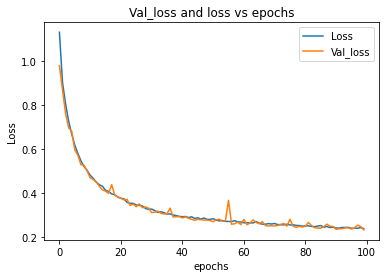

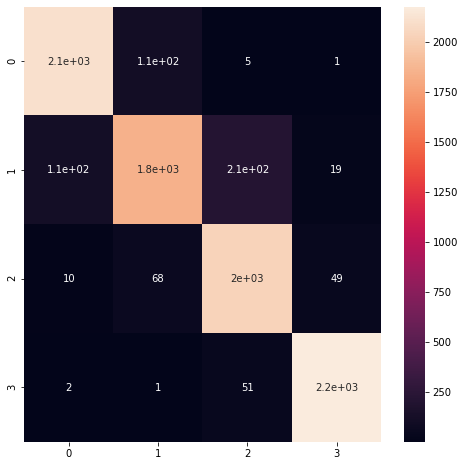

In [25]:
NN_plots(shallow_model,shallow_fit,x1,x2,y1,y2)

In [26]:
deep_model = DEEP_NN()
deep_fit,x1,x2,y1,y2 = NN_fit(deep_model,10000)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                350       
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 204       
Total params: 3,104
Trainable params: 3,104
Non-trainable params: 0
_________________________________________________________________


#### DEEP MODEL VAL_LOSS PLOT AND CONFUSION MATRIRX

8800/8800 [==============================] - 0s 22us/sample - loss: 0.2186 - acc: 0.9233


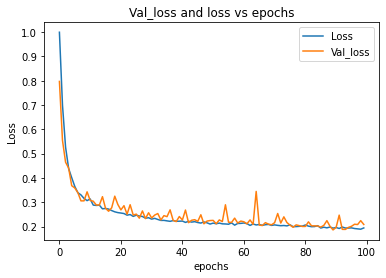

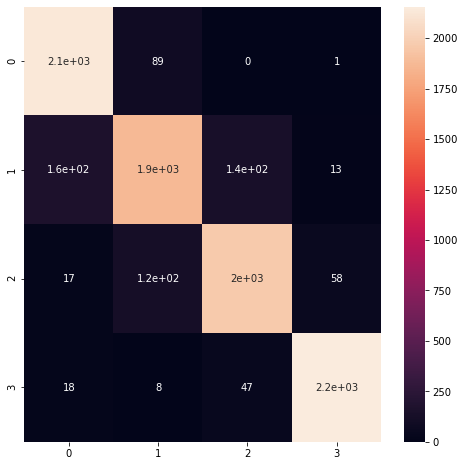

In [27]:
NN_plots(deep_model,deep_fit,x1,x2,y1,y2)

### 0 -> positron (-11),
### 1 -> pion (211),
### 2 -> kaon (321),
### 3 -> proton (2212)



From initial results it can be see that the fits both do very well and they both get very similar accuracys although the deep model does outperform slightly. Looking at the confusion matrices there are some interesting charactersitics . Firstly, both models seem to have a problem classifying kaons, often confusing them for pions but there are signifficantly less missclassifications in the other directions. Furthermore, the shallow model has a fairly sizable problem classifying pions, calling them positrons a lot of the time - this is something the deep model struggles less with. Commenting first on the kaon pion mixup, this seems a fairly sesnible mixup since they are both mesons, the charge is not specified in the data so this may be affecting things if the majority of the pions or kaons are positive and thus negatively charged ones may confuse the model. It is interesting that the shallow model get confused and suggests that some positrons are pions perhaps again due to this charge issue or something that is harder to understand. The deep model however is able to learn more as it is supposed to and get a better undestanding of the dataset as a whole. Perhaps if more layers were added then this pion kaon issue would be reduced as the model understood more deeply the underlying features of the data.

## Testing the NN's sensitivity to size of input data
An experiment to see how amount of data affects the final accuracy will be performed, the input data will range in length from 1,000 to 500,000 data points

In [28]:
def data_NN_exp():
#     input_data = [50,100,150,200]
    input_data = [10000,20000,30000,50000,100000]
    shallow_acc = np.zeros(len(input_data))
    deep_acc = np.zeros(len(input_data))
    
    
    for i in range(len(input_data)):
        shallow_fit1,x1,x2,y1,y2 = NN_fit(shallow_model,input_data[i],epochs=20)
        deep_fit1,x1,x2,y1,y2 = NN_fit(deep_model,input_data[i],epochs=20)
        
        shallow_acc[i] = NN_accuracy(shallow_model,shallow_fit1,x1,x2,y1,y2)
        deep_acc[i] = NN_accuracy(deep_model,deep_fit1,x1,x2,y1,y2)
        
    plt.errorbar(input_data,shallow_acc,fmt="+:")
    plt.errorbar(input_data,deep_acc,fmt="+:")
    plt.title(f"Neural Network accuracy vs Amount of data")
    plt.xlabel("Amount of data")
    plt.ylabel("Accuracy")
    plt.legend(["Shallow","Deep"])
#     plt.semilogx()
    plt.show()
        

69267/69267 [==============================] - 4s 62us/sample - loss: 0.1618 - acc: 0.9437


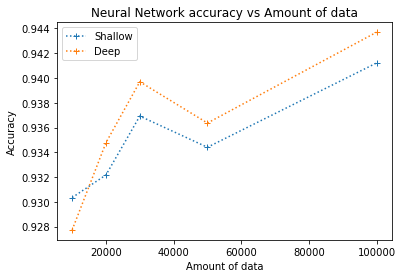

1397.3880531787872


In [29]:
import time
t0 = time.time()

data_NN_exp()


t1 = time.time()
total = t1-t0
print(total)

The graph doesn't say much unfortunately, the seed for this experiment was that the more data the deep NN recieves the more it should outperform the shallow NN. Theoretically there should be a plateau in the shallow NN's performance but the deep NN should continue to grow and learn. The graph seems quite random although there is definitely a trend upwards in accuracy. The run times start to take very long times above 300,000 and this is perhaps where a plateau could be seen, also a deep NN with a number of layers could have been used but time pressure became an important factor in trying to produce results.

## VAE - Potential Idea
An idea that was concieved was to create a VAE or variational auto encoder or a normal autoencoder that could be then used to find anomalies in the data, this could not be realised because transforming the data to create images was not feasible. However the idea would work as follows, the VAE would be created which would train on all the known data, the VAE would then be able to take data as input and reconstruct images to get something that looked like the original data. The VAE or AE would only be able to reconstruct data that was "correct" and so any poorly reconstructed images could be classified as anomalies in the data. Ideally a datset would be used to train the auto-encoder that is known to be correct however since there is such a large amount of data if we assume that only a very small percentage of the data is anomalous then the autoencoder can be still be used for anomaly detection since the anomalous data will be averaged over and essentially have no effect on the auto-encoders ability to reconstruct "true " data. A histogram could be made of the average BCE value for each image, which would hopefully show a bump for the true data and a bump at a much higher value for any anomalous data - this data could then be viewed and or discarded if needs be.  